# Multiple Regression

In [69]:
import pandas as pd                                                #importing the libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [72]:
data=pd.read_csv("D:\\ExcelR\\Datasets\\50_Startups.csv")          # Reading the data
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)    # Renaming the data
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
data1[data1.duplicated()]        # checking for duplicated values
                                 # Here there is no duplicate values

,RDS,ADMS,MKTS,State,Profit


In [76]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [77]:
 data1.corr()                             # Correlation matrix

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


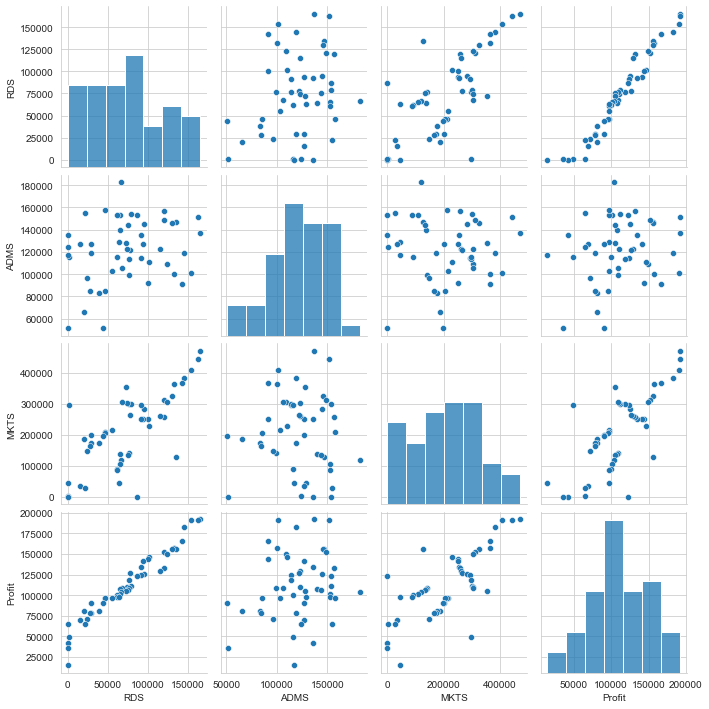

In [78]:
sns.set_style(style='whitegrid')
sns.pairplot(data1)

In [79]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()         # model building and checking

In [80]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [81]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64

In [82]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64

In [83]:
np.round(model.pvalues,5)

Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTS         0.10472
dtype: float64

In [84]:
model.rsquared

0.9507459940683246

In [85]:
model.rsquared_adj

0.9475337762901719

In [86]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()        # checking the model on insignificant variables 
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [87]:
slr_a=smf.ols("Profit~MKTS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [88]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()    # both the varibles are significant so fitting them in a multiple
mlr_am.tvalues , mlr_am.pvalues                        # linear regression model

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [89]:
np.round(mlr_am.pvalues)

Intercept    0.0
ADMS         0.0
MKTS         0.0
dtype: float64

# Model validation with collinearity check

In [90]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

In [91]:
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)

In [92]:
vif_df=pd.DataFrame(d1)

In [93]:
vif_df          # vif for all the variables in the data is < 20
                # so to be considered in the regression equation

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [94]:
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [149]:
data2=data1.drop(data1.index[[49,47]],axis=0).reset_index(drop=True)       # Dropping the collumns with variable values = '0'
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model prediction

In [150]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])       # new data for prediction
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [156]:
Final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit() 

In [152]:
model.rsquared

0.9613162435129847

In [153]:
Final_model.predict(new_data) # manual prediction

0    108853.477442
dtype: float64

In [154]:
pred_y=Final_model.predict(data2)     # automatic prediction of the model
pred_y

0     190256.694058
1     187182.335552
2     180085.698948
3     172113.670250
4     170428.045974
5     162231.650309
6     157843.936070
7     159243.089335
8     151294.185413
9     154025.849905
10    135483.295280
11    135350.244203
12    129414.874826
13    127879.456533
14    149358.431701
15    145873.413684
16    117525.490830
17    130503.971962
18    129091.115233
19    117123.941630
20    117121.857323
21    118095.586948
22    115315.223141
23    110623.806821
24    114185.723646
25    103762.287305
26    111889.249758
27    114957.530440
28    103592.146130
29    103509.900114
30    100982.144498
31     99579.737018
32    100753.751824
33     99124.678791
34     90992.701105
35     91846.124954
36     77478.134523
37     90732.651859
38     71623.365920
39     85342.026077
40     77017.858438
41     76752.585806
42     72838.991301
43     63233.402751
44     67763.447089
45     51185.774535
46     58700.286382
47     52080.463808
dtype: float64

In [ ]:
# R squared values table for each of the models

In [155]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.961316
1,Final_Model,0.959003
